In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [67]:
# data = pd.read_csv('ptx_2_detailed.txt')
filename = 'ptx_3_detailed.txt'
data = pd.read_csv(filename, sep='\t', skiprows=8)  

In [68]:
data

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
0,00:00:00.000,0.504534,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
1,00:00:00.066,0.482500,0.000047,1.630000e-07,0.043294,0.000179,0.000000e+00,0.000000
2,00:00:00.133,0.486283,0.000100,6.220000e-07,0.035456,0.000263,0.000000e+00,0.000000
3,00:00:00.200,0.489442,0.000208,1.230000e-06,0.029037,0.000410,0.000000e+00,0.000000
4,00:00:00.266,0.491621,0.000253,1.008000e-06,0.023781,0.001098,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...
280,00:00:18.666,0.432590,0.000000,0.000000e+00,0.263322,0.007183,2.790000e-07,0.055362
281,00:00:18.733,0.441803,0.000000,0.000000e+00,0.215651,0.007769,2.960000e-07,0.080037
282,00:00:18.800,0.447561,0.000000,0.000000e+00,0.176610,0.007327,3.330000e-07,0.099968
283,00:00:18.866,0.446667,0.000000,0.000000e+00,0.144637,0.008434,3.900000e-07,0.129433


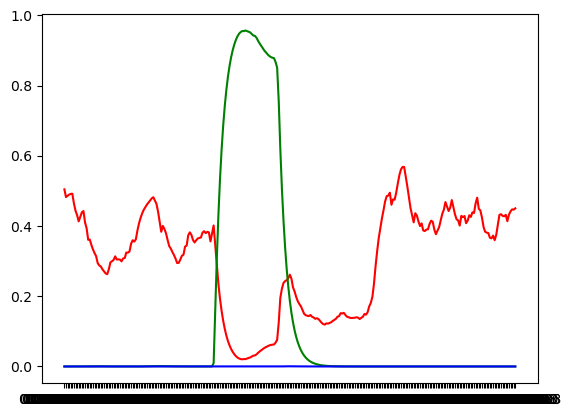

In [71]:
plt.plot(data['Video Time'], data['Neutral'],'r')
plt.plot(data['Video Time'], data['Happy'],'g')
plt.plot(data['Video Time'], data['Sad'],'b')

In [70]:
# data['Combined'] = np.sqrt(data['Neutral']**2 + data['Happy']**2 + data['Sad']**2)
# data['Average'] = (data['Neutral'] + 
#                    data['Happy'] + 
#                    data['Sad'] + 
#                    data['Angry'] + 
#                    data['Surprised'] + 
#                    data['Scared'] + 
#                    data['Disgusted']) / 7.0

In [72]:
valence = [] 
for d in range(len(data)):
    
    sad = data['Sad'][d]
    angry = data['Angry'][d]
    scared = data['Scared'][d]
    disgust = data['Disgusted'][d]
     
    maxNegative = np.max([sad, angry, scared, disgust])
    
    valence.append(data['Happy'][d] - maxNegative)

                   
data['Valence'] = valence 

In [134]:
# plt.plot(data['Video Time'], data['Valence'], 'k')
# print([sad, angry, disgust, scared])
# print(maxNegative)
time = []

for i in range(len(data)):
    time.append(float(data['Video Time'][i][-1-5:-1])) # .astype(float)

data['Video Timef'] = time

0       0.00
1       0.06
2       0.13
3       0.20
4       0.26
       ...  
280    18.66
281    18.73
282    18.80
283    18.86
284    18.93
Name: Video Timef, Length: 285, dtype: float64

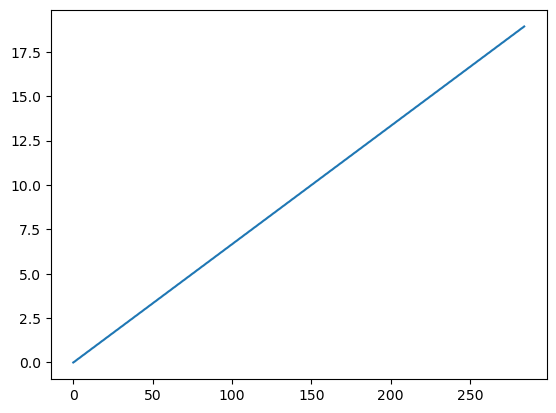

In [135]:
plt.plot(time)

data['Video Timef']

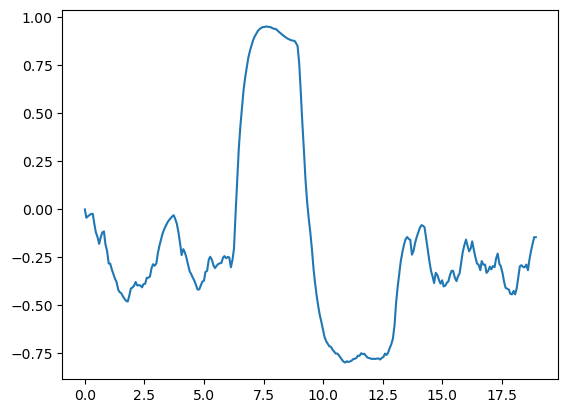

In [137]:
plt.plot(data['Video Timef'], data['Valence'])

<Axes: xlabel='Video Timef', ylabel='Valence'>

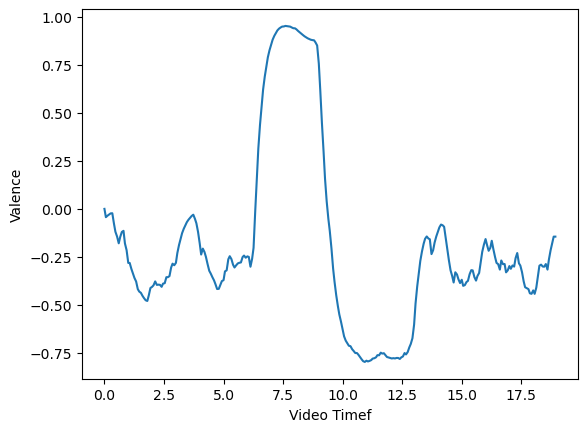

In [139]:
sns.lineplot(data=data, x='Video Timef',y='Valence')